# Phase 1:

In [58]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from sklearn.utils import shuffle
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [19]:
(X_train, y_train) , (X_test, y_test) = fashion_mnist.load_data()

In [20]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [21]:
X = X.reshape((X.shape[0], -1))

In [22]:
X = X / 255.0

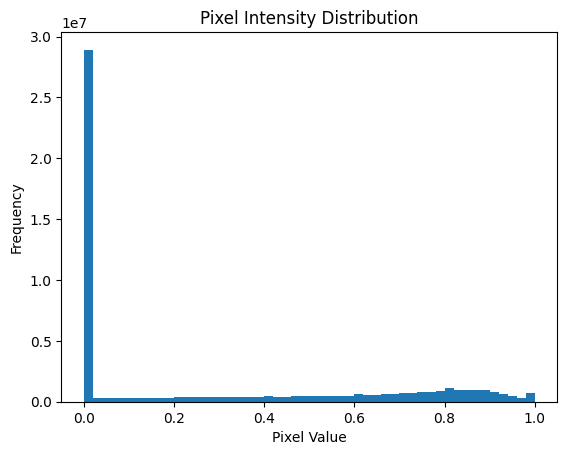

In [23]:
plt.hist(X.ravel(), bins=50)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

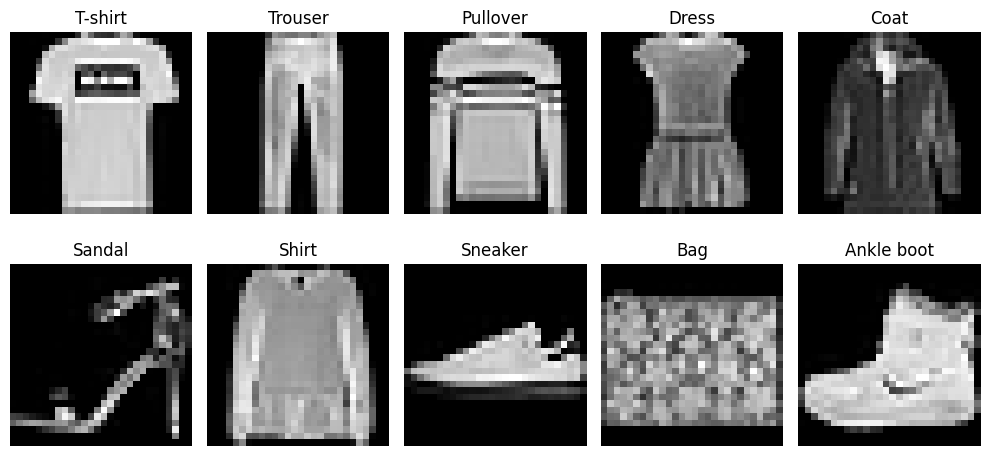

In [24]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 5))
for i in range(10):
    idx = np.where(y == i)[0][0]
    img = X[idx].reshape(28, 28)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# Phase 2:

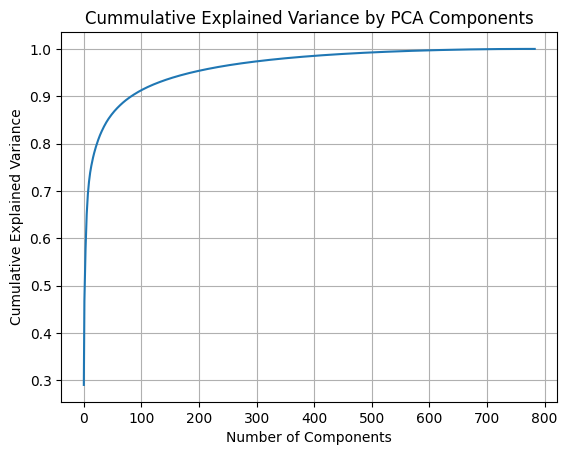

In [25]:
pca = PCA()
pca.fit(X)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(explained_variance)
plt.title('Cummulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [26]:
components_list = [10, 50, 100]
reconstructions = {}

for n in components_list:
    pca_n = PCA(n_components=n)
    X_pca = pca_n.fit_transform(X)
    X_reconstructed = pca_n.inverse_transform(X_pca)
    mse = mean_squared_error(X, X_reconstructed)
    reconstructions[n] = (X_reconstructed, mse)
    print(f"Reconstruction with {n} components - MSE: {mse:.4f}")

Reconstruction with 10 components - MSE: 0.0244
Reconstruction with 50 components - MSE: 0.0120
Reconstruction with 100 components - MSE: 0.0076


In [27]:
X.shape

(70000, 784)

In [28]:
from sklearn.decomposition import PCA

components_list = [10, 50, 100]
reconstructions = {}

for n in components_list:
    pca = PCA(n_components=n, random_state=42)
    X_pca = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    reconstructions[n] = X_reconstructed


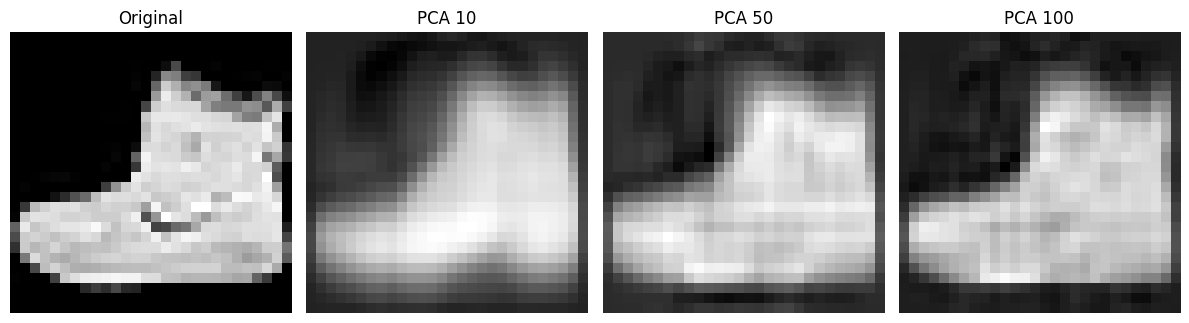

In [29]:
import matplotlib.pyplot as plt

components_list = [10, 50, 100]
idx = 0

plt.figure(figsize=(12, 4))

original = X[idx].reshape(28, 28)
plt.subplot(1, len(components_list) + 1, 1)
plt.imshow(original, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, n in enumerate(components_list):
    reconstructed = reconstructions[n][idx].reshape(28, 28)
    plt.subplot(1, len(components_list) + 1, i + 2)
    plt.imshow(reconstructed, cmap='gray')
    plt.title(f"PCA {n}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [30]:
X.shape

(70000, 784)

In [31]:
y.shape

(70000,)

In [32]:
components = [10, 50, 100]


for n in components:

    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)


    X_reconstructed = pca.inverse_transform(X_pca)


    mse = mean_squared_error(X, X_reconstructed)
    print(f"Mean Squared Error ({n} components): {mse:.9f}")

Mean Squared Error (10 components): 0.024367248
Mean Squared Error (50 components): 0.011950479
Mean Squared Error (100 components): 0.007628164


In [33]:
from sklearn.decomposition import TruncatedSVD
for n in components:

    svd = TruncatedSVD(n_components=n)
    X_svd = svd.fit_transform(X)


    X_reconstructed = svd.inverse_transform(X_svd)

    mse = mean_squared_error(X, X_reconstructed)
    print(f"SVD Mean Squared Error ({n} components): {mse:.9f}")

SVD Mean Squared Error (10 components): 0.024489819
SVD Mean Squared Error (50 components): 0.011969322
SVD Mean Squared Error (100 components): 0.007651341


# Phase 3



In [34]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [35]:

pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X)

In [36]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

kmeans_inertia = kmeans.inertia_
kmeans_silhouette = silhouette_score(X_pca, kmeans_labels)

print("K-Means Inertia:", kmeans_inertia)
print("K-Means Silhouette Score:", kmeans_silhouette)

K-Means Inertia: 1592442.7815481978
K-Means Silhouette Score: 0.18492812866097677


In [37]:
print("K-Means Clustering Evaluation for different K values:")
for k in [5, 10, 15]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_pca, labels)
    print(f"K={k} → Inertia: {inertia:.2f}, Silhouette: {silhouette:.4f}")

K-Means Clustering Evaluation for different K values:
K=5 → Inertia: 2139451.95, Silhouette: 0.2109
K=10 → Inertia: 1592442.78, Silhouette: 0.1849
K=15 → Inertia: 1344678.48, Silhouette: 0.1703


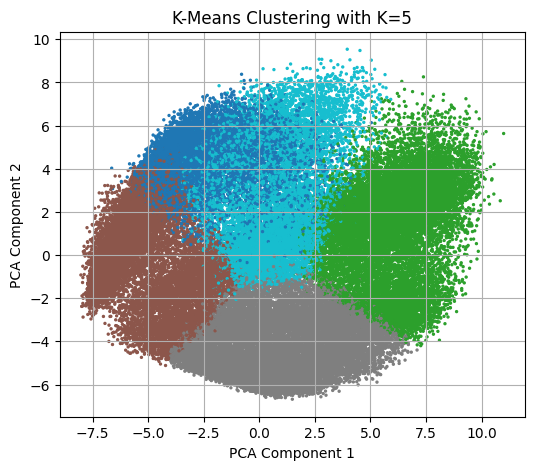

In [38]:
kmeans_5 = KMeans(n_clusters=5, random_state=42)
labels_5 = kmeans_5.fit_predict(X_pca)

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_5, cmap='tab10', s=2)
plt.title("K-Means Clustering with K=5")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

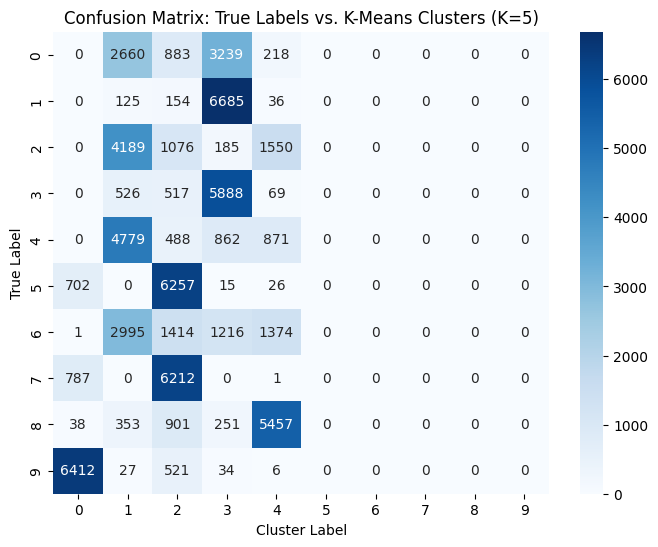

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y, labels_5)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: True Labels vs. K-Means Clusters (K=5)")
plt.xlabel("Cluster Label")
plt.ylabel("True Label")
plt.show()

In [40]:
X_scaled = StandardScaler().fit_transform(X_pca)

dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

mask = dbscan_labels != -1
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    print("DBSCAN Silhouette Score:", dbscan_silhouette)
else:
    print("DBSCAN did not find sufficient clusters.")

DBSCAN Silhouette Score: -0.013333680577585695


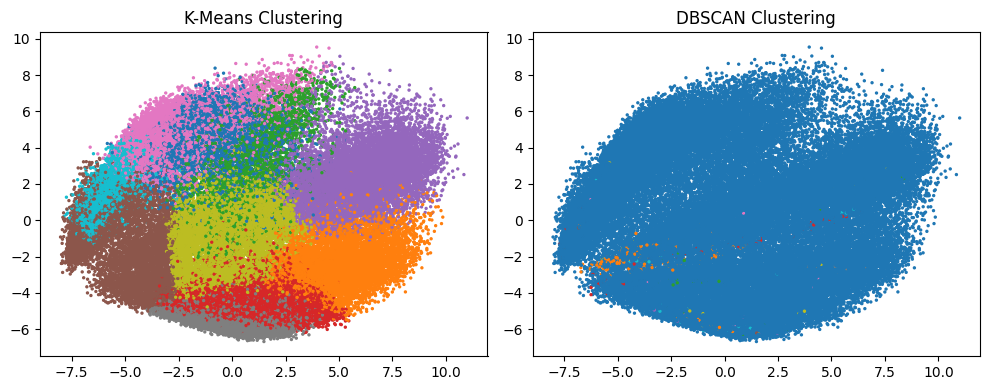

In [41]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans_labels, cmap='tab10', s=2)
plt.title("K-Means Clustering")

plt.subplot(1, 2, 2)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=dbscan_labels, cmap='tab10', s=2)
plt.title("DBSCAN Clustering")

plt.tight_layout()
plt.show()

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

In [43]:
X_scaled = StandardScaler().fit_transform(X_pca)


eps_values = [1.5, 2.0, 2.5, 3.0]
min_samples_values = [3, 5, 10]

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters > 1:
            sil_score = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
        else:
            sil_score = -1

        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'clusters': n_clusters,
            'noise_points': n_noise,
            'silhouette': sil_score
        })


import pandas as pd
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='silhouette', ascending=False)
print(results_df)


    eps  min_samples  clusters  noise_points  silhouette
2   1.5           10         2         69941    0.726464
1   1.5            5        19         69772    0.375713
0   1.5            3       103         69393    0.322375
5   2.0           10        23         68467    0.188753
8   2.5           10        34         63292    0.012990
4   2.0            5        87         67185   -0.013334
3   2.0            3       266         65888   -0.103435
11  3.0           10        43         54115   -0.136618
7   2.5            5       134         60790   -0.175911
10  3.0            5       186         49612   -0.239350
6   2.5            3       571         57947   -0.242146
9   3.0            3       688         45491   -0.315886


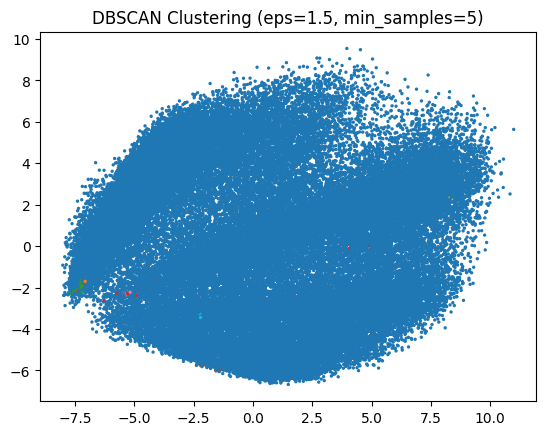

In [44]:

best_eps = 1.5
best_min_samples = 5

db = DBSCAN(eps=best_eps, min_samples=best_min_samples)
db_labels = db.fit_predict(X_scaled)


plt.scatter(X_2d[:, 0], X_2d[:, 1], c=db_labels, cmap='tab10', s=2)
plt.title(f"DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})")
plt.show()

# Phase 4:

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [46]:

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

In [47]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

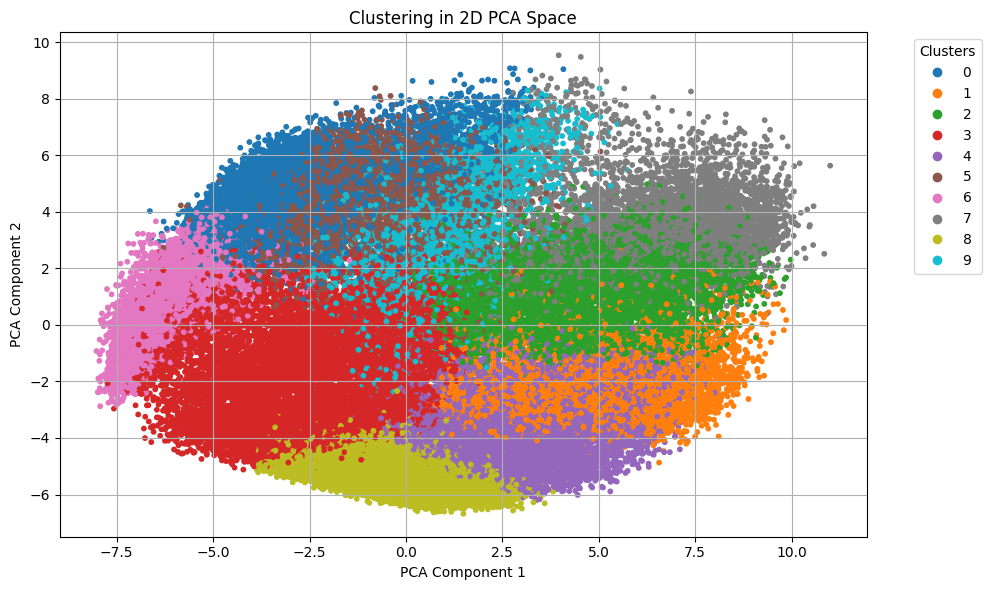

In [48]:

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cluster_labels, cmap='tab10', s=10)
plt.title('Clustering in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

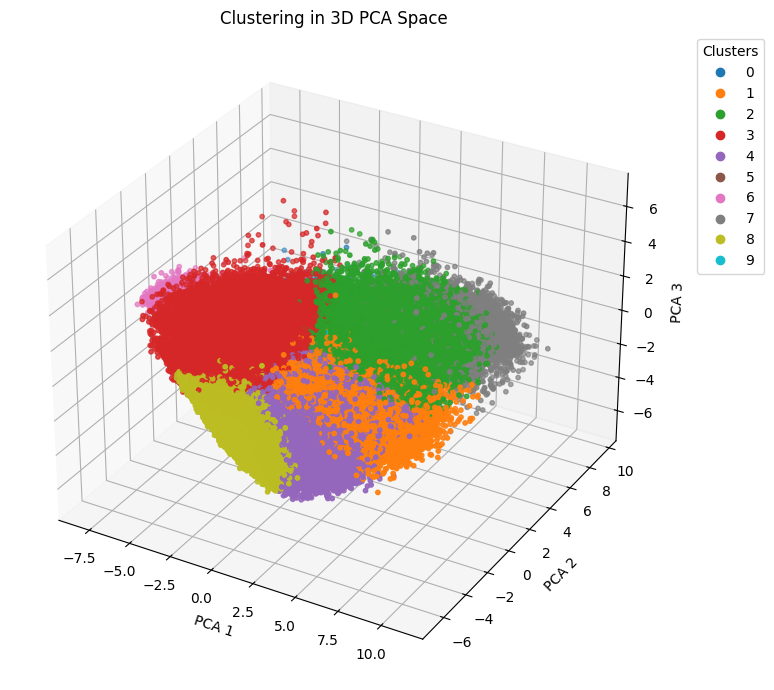

In [49]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=cluster_labels, cmap='tab10', s=10)
ax.set_title("Clustering in 3D PCA Space")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.legend(*sc.legend_elements(), title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [50]:
pca_64 = PCA(n_components=64)
X_pca_64 = pca_64.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca_64)

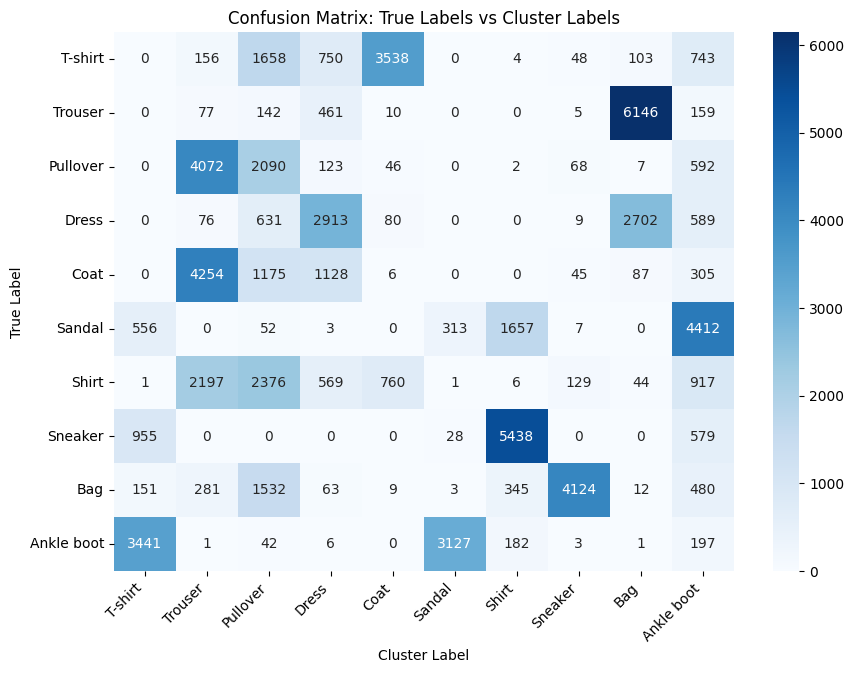

In [51]:

conf_matrix = confusion_matrix(y, cluster_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: True Labels vs Cluster Labels')
plt.xlabel('Cluster Label')
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=45, ha='right')
plt.ylabel('True Label')
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0)
plt.show()

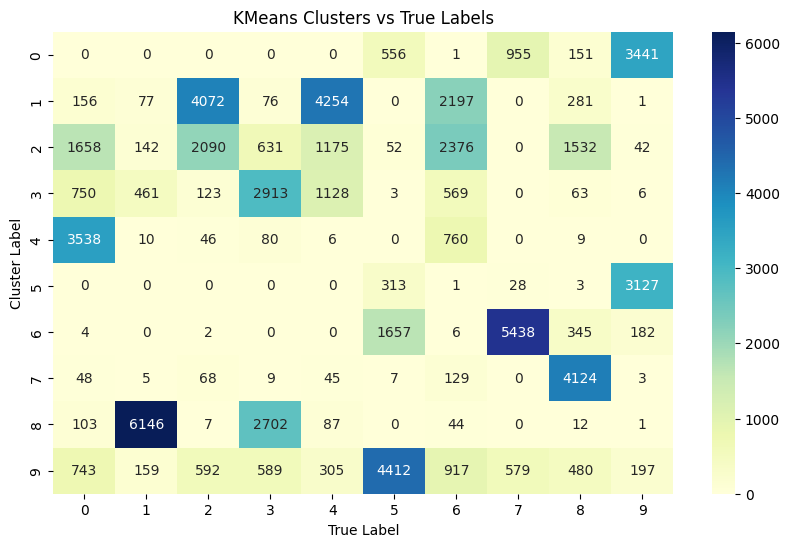

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cluster_labels = kmeans.labels_
true_labels = y

ct = pd.crosstab(cluster_labels, true_labels)

plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title("KMeans Clusters vs True Labels")
plt.xlabel("True Label")
plt.ylabel("Cluster Label")
plt.show()

In [56]:
ct.loc[4]

,4
col_0,
0,3538
1,10
2,46
3,80
4,6
5,0
6,760
7,0
8,9


**Which classes cluster and why?**
Based on the heatmap comparison of KMeans clusters and true labels, categories like Sneakers, Ankle Boots, and Sandals clustered well. These items have distinct visual outlines and pixel patterns, making them easier to separate in PCA-reduced space. On the other hand, classes like Shirts and T-Shirts were often confused due to their visual similarity, leading to overlapping clusters.

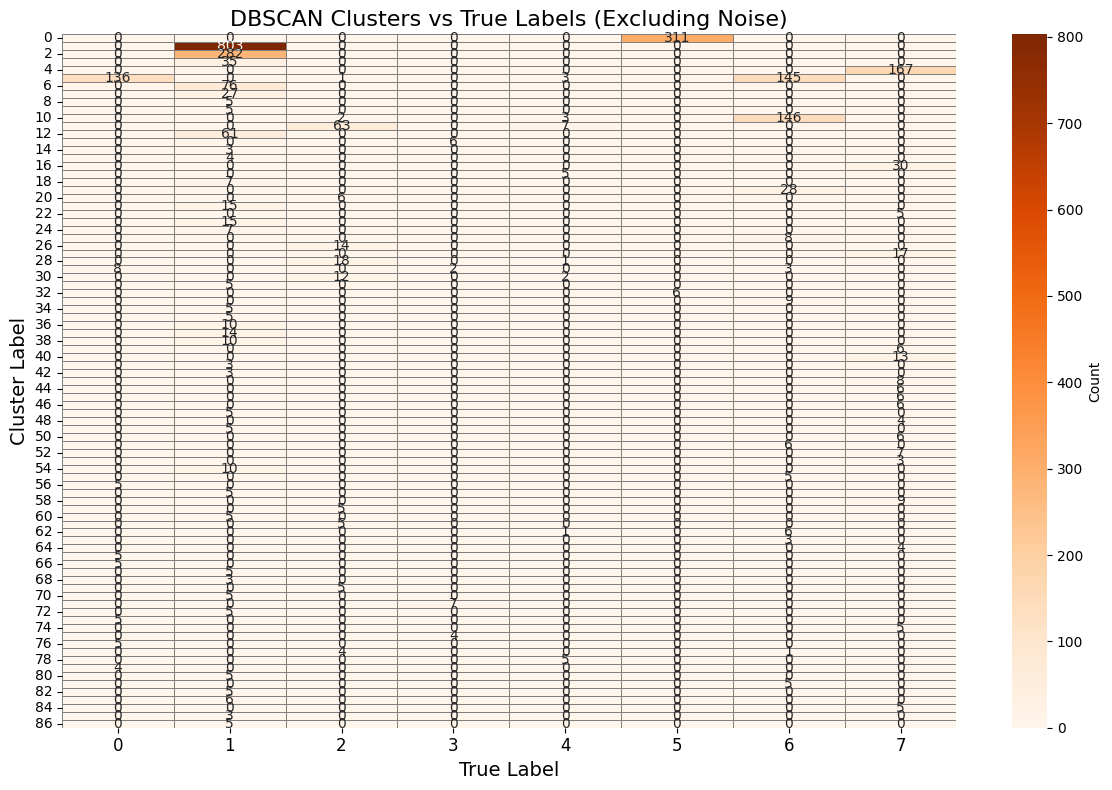

Silhouette Score for DBSCAN: -0.04634894029800285


In [53]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mask = dbscan_labels != -1
filtered_labels = dbscan_labels[mask]
filtered_true_labels = y[mask]

ct_dbscan = pd.crosstab(filtered_labels, filtered_true_labels)

plt.figure(figsize=(12, 8))
sns.heatmap(
    ct_dbscan,
    annot=True,
    fmt='d',
    cmap='Oranges',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Count'}
)

plt.title("DBSCAN Clusters vs True Labels (Excluding Noise)", fontsize=16)
plt.xlabel("True Label", fontsize=14)
plt.ylabel("Cluster Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

if len(set(filtered_labels)) > 1:
    sil_score_dbscan = silhouette_score(X_pca_64[mask], filtered_labels)
    print("Silhouette Score for DBSCAN:", sil_score_dbscan)
else:
    print("Silhouette Score not applicable – only one cluster found.")

# Integrating Gradio & Streamlit

## Gradio

In [54]:
from sklearn.decomposition import PCA

pca_64 = PCA(n_components=64)
X_pca_64 = pca_64.fit_transform(X)

In [55]:
import gradio as gr
import numpy as np
from PIL import Image

def predict_cluster(image):
    try:

        image = Image.fromarray(image).convert('L').resize((28, 28))
        img_array = np.array(image).reshape(1, -1) / 255.0

        img_pca = pca_64.transform(img_array)
        cluster = kmeans.predict(img_pca)[0]

        return f"Predicted Cluster: {cluster}"

    except Exception as e:
        return f"Error: {str(e)}"

gr.Interface(
    fn=predict_cluster,
    inputs=gr.Image(type="numpy", image_mode="L"),
    outputs="text",
    title="Fashion MNIST Cluster Predictor"
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://09229c1aeb1a4c08d5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
